In [467]:
import pandas as pd
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import numpy as np

In [468]:
collision_data = pd.read_csv('collision_reports_processed.csv')
collision_data = collision_data.fillna('UNKNOWN')
traffic_data = pd.read_csv('traffic_counts_processed.csv')

In [469]:
collision_data.columns

Index(['date_time', 'year', 'month', 'day', 'hour_minute', 'person_role',
       'veh_make', 'violation_section', 'violation_type', 'charge_desc',
       'injured', 'killed', 'street_name_primary', 'street_name_intersecting'],
      dtype='object')

In [470]:
traffic_data.columns

Index(['date_count', 'street_name', 'total_count'], dtype='object')

In [471]:
# calculate the average traffic count of each street
traffic_groupby_street = traffic_data.groupby('street_name')
traffic_average_street = traffic_groupby_street.sum('total_count') / traffic_groupby_street.count()
traffic_average_street.columns

Index(['date_count', 'total_count'], dtype='object')

In [472]:
# collision count from different car maker and choose those larger than 20
# question: we dont know the total car number of different car maker, so this is not so persuasive
carmaker_count = defaultdict(int)
for d in collision_data['veh_make']:
    carmaker_count[d] += 1
carmaker_count = sorted(carmaker_count.items(), key = lambda x: x[1], reverse = True)
carmaker_count = {name: count for name, count in carmaker_count[:20]}


In [473]:
carmaker_count

{'TOYOTA': 13168,
 'HONDA': 8784,
 'FORD': 8522,
 'UNKNOWN': 8199,
 'NISSAN': 5855,
 'CHEVROLET': 4531,
 'HYUNDAI': 2787,
 'DODGE': 2334,
 'B.M.W.': 2315,
 'KIA': 2084,
 'LEXUS': 1924,
 'VOLKSWAGEN': 1917,
 'JEEP': 1878,
 'MERCEDES-BENZ': 1811,
 'MAZDA': 1712,
 'SUBARU': 1074,
 'ACURA': 1001,
 'GENERAL MOTORS CORP': 855,
 'CHRYSLER': 764,
 'AUDI': 707}

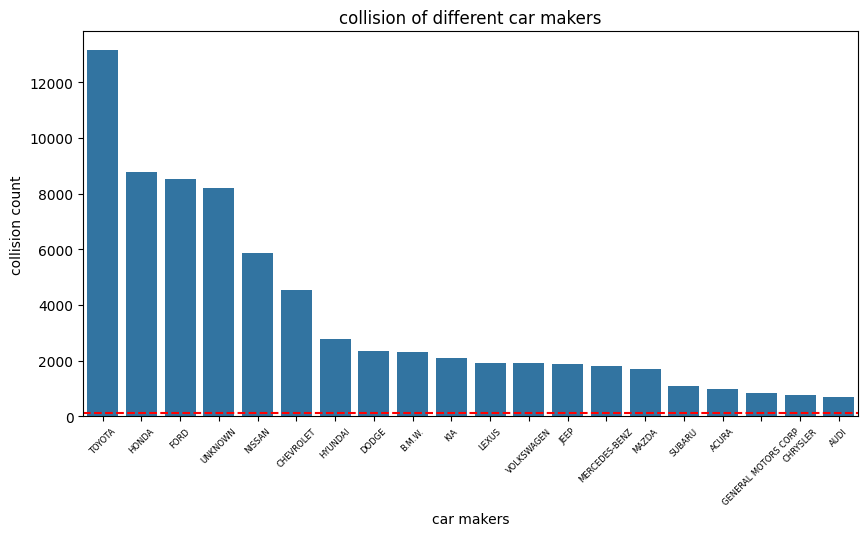

In [474]:
# visualization
plt.figure(figsize=(10, 5))
sns.barplot(x=carmaker_count.keys(), y=carmaker_count.values())
plt.axhline(y=carmaker_average, color='r', linestyle='--', label='Horizontal Line at y=8')
plt.title('collision of different car makers')
plt.xlabel('car makers')
plt.xticks(fontsize=6)
plt.ylabel('collision count')
plt.xticks(rotation=45)
plt.show()

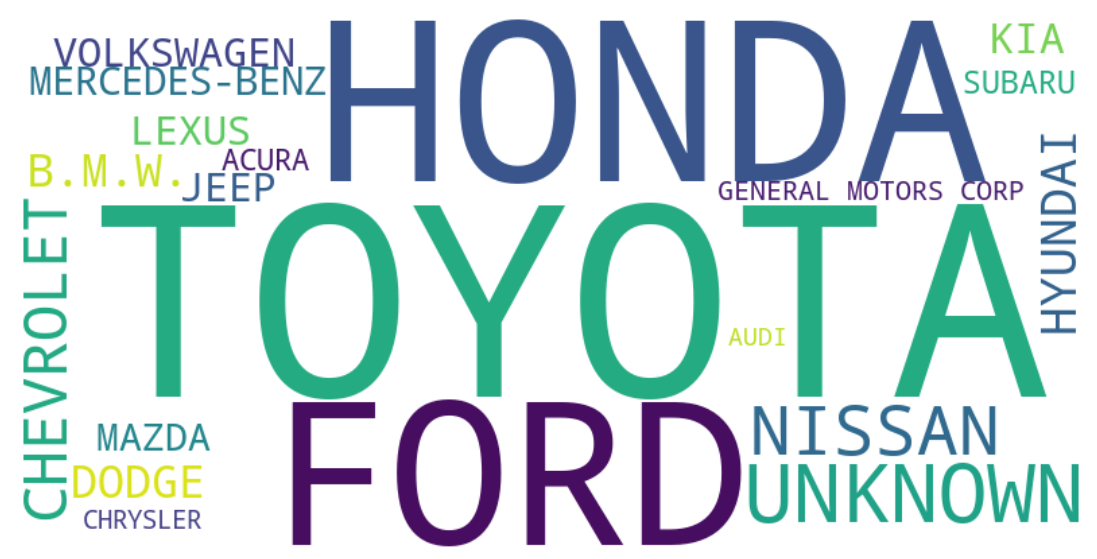

In [475]:
# 生成词云对象，并根据词频生成词云
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(carmaker_count)
# 绘制词云
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [476]:
# collision count of different month
month_count = collision_data.groupby('month').count()
month_count = month_count['date_time']
month_count

month
1     6525
2     5980
3     6570
4     5939
5     6293
6     6493
7     6937
8     7959
9     7775
10    8335
11    6595
12    6621
Name: date_time, dtype: int64

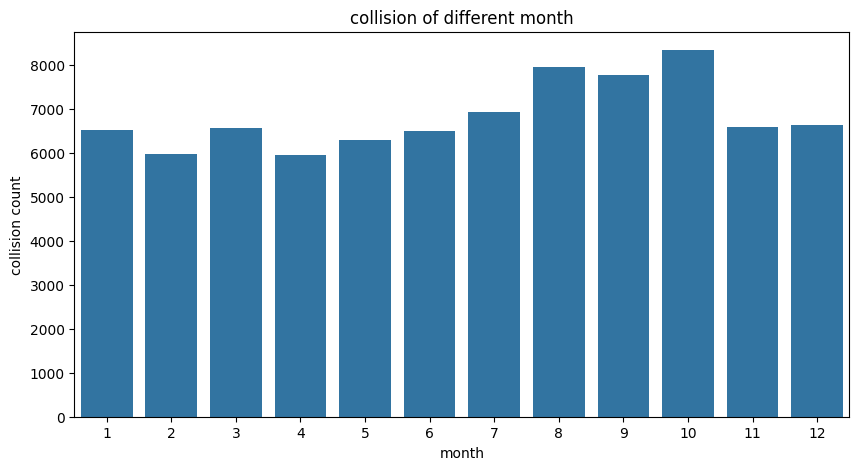

In [477]:
plt.figure(figsize=(10, 5))
sns.barplot(x=month_count.index, y=month_count.values)
plt.title('collision of different month')
plt.xlabel('month')
plt.ylabel('collision count')
plt.show()

In [478]:
# collision count of different day
day_count = collision_data.groupby('day').count()
day_count = day_count['date_time']
day_count

day
1     2821
2     2696
3     2713
4     2739
5     2867
6     2619
7     2736
8     2673
9     2759
10    2615
11    2806
12    2552
13    2807
14    2781
15    2582
16    2802
17    2614
18    2859
19    2741
20    2712
21    2655
22    2705
23    2699
24    2587
25    2504
26    2575
27    2631
28    2601
29    2503
30    2471
31    1597
Name: date_time, dtype: int64

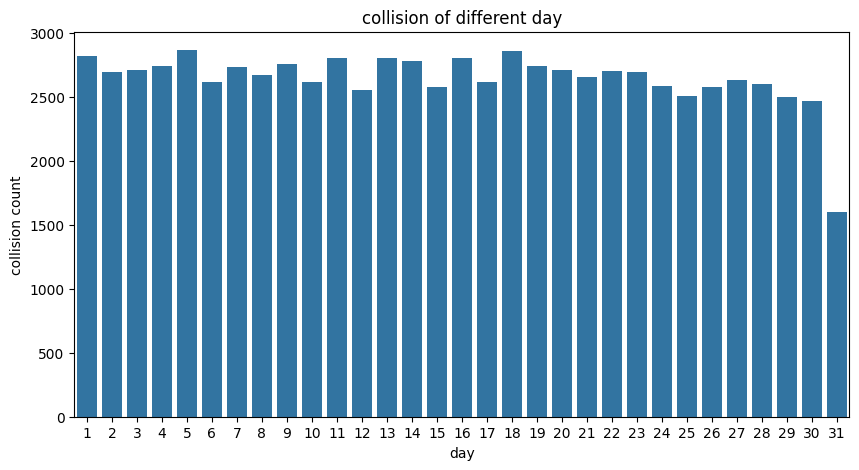

In [479]:
plt.figure(figsize=(10, 5))
sns.barplot(x=day_count.index, y=day_count.values)
plt.title('collision of different day')
plt.xlabel('day')
plt.ylabel('collision count')
plt.show()

In [480]:
# collision count of different time within a day
hour_count = defaultdict(int)
for t in collision_data['hour_minute']:
    hour_count[t[:2]] += 1
    
hours = sorted(hour_count.items(), key = lambda x: x[0]) 
hours = {hour: count for hour, count in hours}

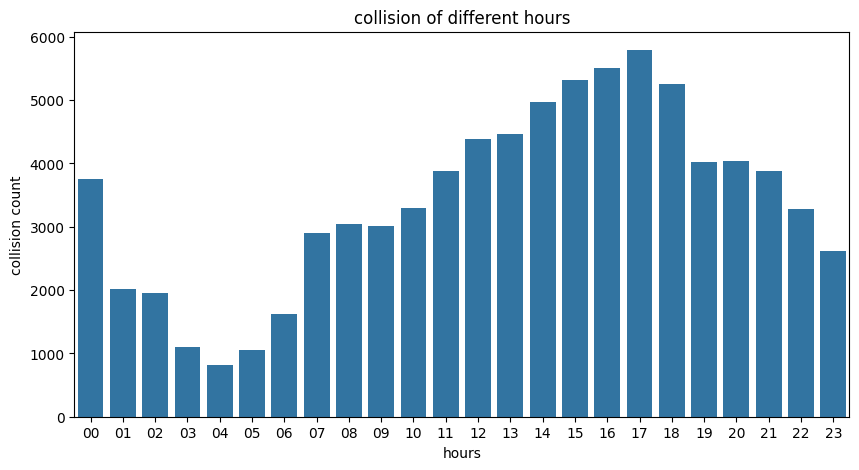

In [481]:
# visualization
plt.figure(figsize=(10, 5))
sns.barplot(x=hours.keys(), y=hours.values())
plt.title('collision of different hours')
plt.xlabel('hours')
plt.ylabel('collision count')
plt.show()

In [482]:
# collision count in minutes
minute_count = collision_data.groupby('hour_minute').count()
minute_count = minute_count['date_time']
minute_count_dict = defaultdict(int)
for index, value in minute_count.items():
    index_minute = (int(index[:2]) * 60 + int(index[-2:]))//5
    minute_count_dict[index_minute] += value

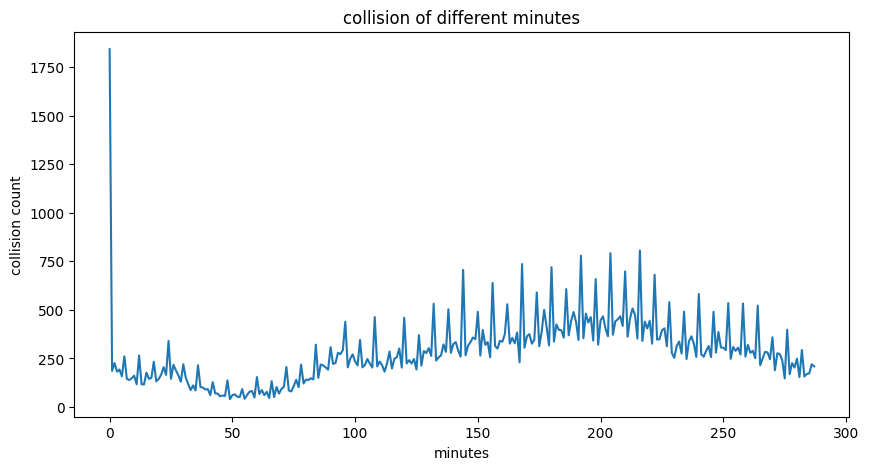

In [483]:
# my plot is ugly, especially this one, try some different ways
plt.figure(figsize=(10, 5))

sns.lineplot(x=minute_count_dict.keys(), y=minute_count_dict.values())
plt.title('collision of different minutes')
plt.xlabel('minutes')
plt.ylabel('collision count')
plt.show()

In [484]:
# collision count of different month and hour to see the influence of seasons
monthour_count = defaultdict(int)
# collision_data[monthour] = 
# monthour_count = collision_data.groupby(['month', 'hour_minute']).count()
for d in collision_data.values:
#     print(d)
    index = (d[2] - 1) * 24 + int(d[4][:2])
    monthour_count[index] += 1

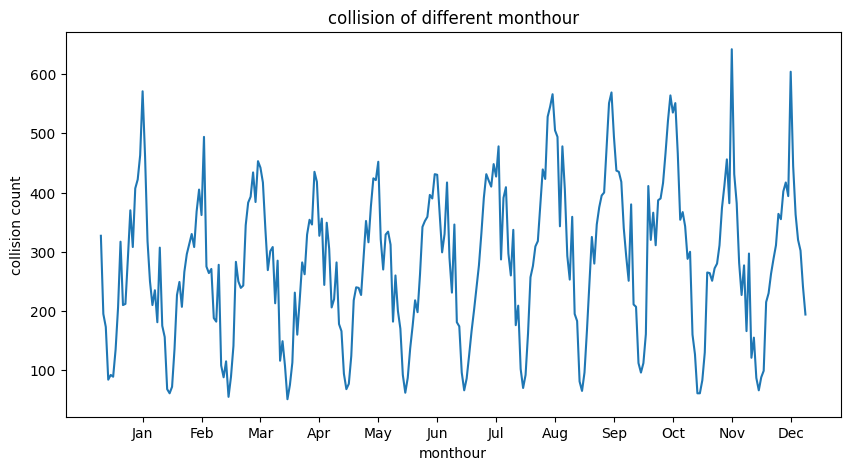

In [485]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthour_count.keys(), y=monthour_count.values())
plt.title('collision of different monthour')
plt.xlabel('monthour')
plt.ylabel('collision count')
plt.xticks(range(17, 12 * 24 + 17, 24), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [486]:
# collision count of each street
street_count = collision_data.groupby('street_name_primary').count()
street_count = street_count['date_time']
street_count.sort_values(ascending = False)

# collision count divided by the average traffic count of the street to describe how dangerous the street is
# the collision rate sort of things
dangerous_coefficient = {}
for index, value in street_count.items():
    if index not in traffic_average_street.index: continue
    dangerous_coefficient[index] = value / traffic_average_street.loc[index]['total_count']

In [487]:
dangerous_coefficient = sorted(dangerous_coefficient.items(), key = lambda x: x[1], reverse = True)

In [488]:
dangerous_coefficient

[('UNIVERSITY AVENUE', 0.1453061470913372),
 ('EL CAJON BOULEVARD', 0.12260906897092286),
 ('IMPERIAL AVENUE', 0.12103399281592113),
 ('MARKET STREET', 0.11026134605619),
 ('LOGAN AVENUE', 0.08257837299288677),
 ('ISLAND AVENUE', 0.07844486495785309),
 ('ORANGE AVENUE', 0.0757874987656759),
 ('THORN STREET', 0.07419927806107833),
 ('EUCLID AVENUE', 0.07088395044805786),
 ('BEECH STREET', 0.07007751937984497),
 ('SPRUCE STREET', 0.069164265129683),
 ('REED AVENUE', 0.06719761075161772),
 ('COWLEY WAY', 0.06363325350667123),
 ('BALBOA DRIVE', 0.06086445163187298),
 ('MISSION BOULEVARD', 0.05975528888318467),
 ('NATIONAL AVENUE', 0.05924431941138281),
 ('DAWES STREET', 0.05852793378657996),
 ('CLAIREMONT MESA BOULEVARD', 0.058043651485855566),
 ('OCEAN VIEW BOULEVARD', 0.05777338810277549),
 ('E STREET', 0.05225078709785034),
 ('FIESTA ISLAND ROAD', 0.05135426157541622),
 ('TROJAN AVENUE', 0.05059220331006353),
 ('FAIRMOUNT AVENUE', 0.050311560169231925),
 ('C STREET', 0.04961248248011213

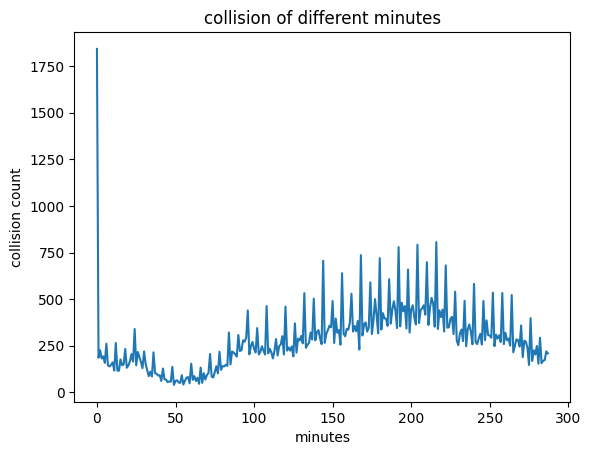

In [489]:
sns.lineplot(x=minute_count_dict.keys(), y=minute_count_dict.values())
plt.title('collision of different minutes')
plt.xlabel('minutes')
plt.ylabel('collision count')
plt.show()

In [490]:
word_frequencies = dict(dangerous_coefficient[:50])

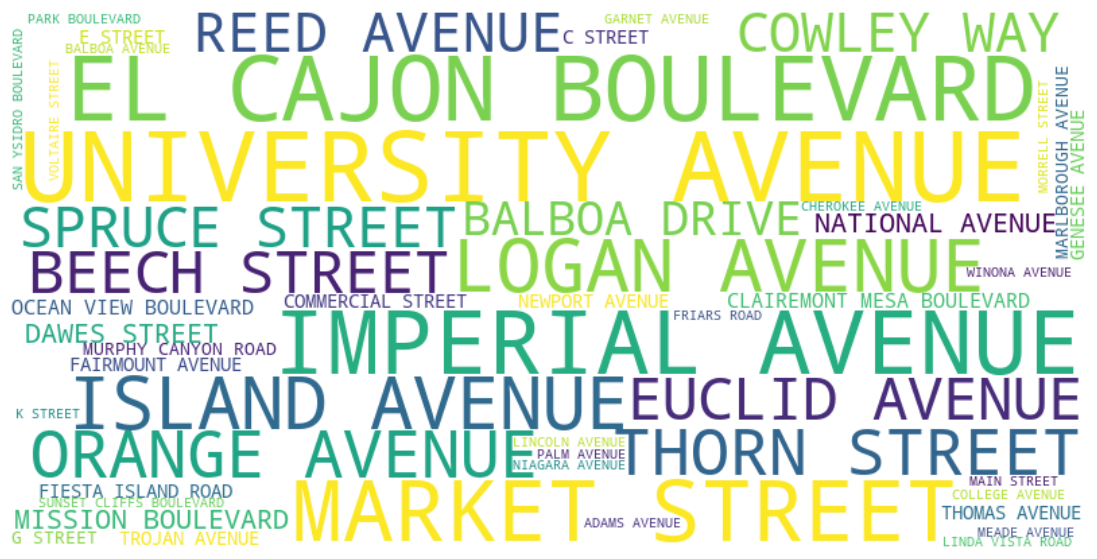

In [491]:
# 生成词云对象，并根据词频生成词云
wordcloud = WordCloud(width=800, height=400, background_color = 'white').generate_from_frequencies(word_frequencies)
# 绘制词云
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [492]:
# dangerous_coefficient = pd.DataFrame(dangerous_coefficient[:50], columns = ['word', 'weight'])

In [493]:
# dangerous_coefficient = dangerous_coefficient[['weight', 'word']]
# dangerous_coefficient

In [494]:
# dangerous_coefficient.to_csv('street_count.csv', index=False)

In [495]:
# average injured people for each collision event based on different role
group_by_role = collision_data.groupby('person_role')
role_injured = group_by_role['injured']
role_injured.sum() / role_injured.count()

person_role
BICYCLIST                  0.982639
DRIVER                     0.882169
OTHER                      0.779412
PARKED VEHICLE OCCUPANT    0.238099
PASSENGER                  1.411320
UNKNOWN                    0.483110
Name: injured, dtype: float64

In [496]:
# average killed people for each collision event based on different role
role_killed = group_by_role['killed']
role_killed.sum() / role_killed.count()

person_role
BICYCLIST                  0.009722
DRIVER                     0.006944
OTHER                      0.014706
PARKED VEHICLE OCCUPANT    0.002710
PASSENGER                  0.014528
UNKNOWN                    0.003217
Name: killed, dtype: float64

In [497]:
# try to find the most common collision factor
groupby_collisionfactor = collision_data.groupby('charge_desc')
groupby_collisionfactor = groupby_collisionfactor['injured']
groupby_collisionfactor.count().sort_values(ascending = False)

charge_desc
MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHICLE CODE         11615
TURNS:UNSAFE TURN AND/OR NO TURN SIGNAL (I)                    10045
UNSAFE SPEED (BASIC SPEED LAW) (I)                              7625
TURNING MOVEMENTS AND REQUIRED SIGNALS                          7229
VIOLATION OF BASIC SPEED LAW, SPEED UNSAFE FOR CONDITIONS       4332
                                                               ...  
MUST WEAR HELMET WHILE OPERATE CLASS 3 ELECTRIC BICYCLE (I)        1
MUST BE ABLE TO REACH AND OPERATE ALL CONTROLS (I)                 1
MISCELLANEOUS NON-HAZARDOUS VIOLATIONS OF THE VEHICLE CODE         1
MINOR UNDER 21YR DRIVE W/BAC 0.05 (I)                              1
MOTORIZED SCOOTER SHALL SAFELY LEAVE BIKE LANE (I)                 1
Name: injured, Length: 387, dtype: int64

In [498]:
collision_data.groupby(['charge_desc', 'street_name_primary']).count().sort_values(by = 'injured', ascending = False)[200:]

date_time  \
charge_desc                                        street_name_primary              
UNSAFE SPEED (BASIC SPEED LAW) (I)                 CORONADO AVENUE             58   
SIGNAL LIGHTS:CIRCULAR RED (I)                     COLLEGE AVENUE              58   
MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHIC... AERO DRIVE                  58   
                                                   CARMEL VALLEY ROAD          57   
TURNS:UNSAFE TURN AND/OR NO TURN SIGNAL (I)        FEDERAL BOULEVARD           57   
...                                                                           ...   
MINOR UNDER 21YR DRIVE W/BAC 0.05 (I)              OTAY MESA ROAD               1   
FOLLOWING TOO CLOSELY (I)                          SANTO ROAD                   1   
                                                   SANTA MONICA AVENUE          1   
                                                   SAN PASQUAL ROAD             1   
A PERSON NOT OPERATE VEHICLE WITH WINDOW/VIEW O... MEADE AVENUE                 1   

                                                                        year  \
charge_desc                                        street_name_primary         
UNSAFE SPEED (BASIC SPEED LAW) (I)                 CORONADO AVENUE        58   
SIGNAL LIGHTS:CIRCULAR RED (I)                     COLLEGE AVENUE         58   
MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHIC... AERO DRIVE             58   
                                                   CARMEL VALLEY ROAD     57   
TURNS:UNSAFE TURN AND/OR NO TURN SIGNAL (I)        FEDERAL BOULEVARD      57   
...                                                                      ...   
MINOR UNDER 21YR DRIVE W/BAC 0.05 (I)              OTAY MESA ROAD          1   
FOLLOWING TOO CLOSELY (I)                          SANTO ROAD              1   
                                                   SANTA MONICA AVENUE     1   
                                                   SAN PASQUAL ROAD        1   
A PERSON NOT OPERATE VEHICLE WITH WINDOW/VIEW O... MEADE AVENUE            1   

                                                                        month  \
charge_desc                                        street_name_primary          
UNSAFE SPEED (BASIC SPEED LAW) (I)                 CORONADO AVENUE         58   
SIGNAL LIGHTS:CIRCULAR RED (I)                     COLLEGE AVENUE          58   
MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHIC... AERO DRIVE              58   
                                                   CARMEL VALLEY ROAD      57   
TURNS:UNSAFE TURN AND/OR NO TURN SIGNAL (I)        FEDERAL BOULEVARD       57   
...                                                                       ...   
MINOR UNDER 21YR DRIVE W/BAC 0.05 (I)              OTAY MESA ROAD           1   
FOLLOWING TOO CLOSELY (I)                          SANTO ROAD               1   
                                                   SANTA MONICA AVENUE      1   
                                                   SAN PASQUAL ROAD         1   
A PERSON NOT OPERATE VEHICLE WITH WINDOW/VIEW O... MEADE AVENUE             1   

                                                                        day  \
charge_desc                                        street_name_primary        
UNSAFE SPEED (BASIC SPEED LAW) (I)                 CORONADO AVENUE       58   
SIGNAL LIGHTS:CIRCULAR RED (I)                     COLLEGE AVENUE        58   
MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHIC... AERO DRIVE            58   
                                                   CARMEL VALLEY ROAD    57   
TURNS:UNSAFE TURN AND/OR NO TURN SIGNAL (I)        FEDERAL BOULEVARD     57   
...                                                                     ...   
MINOR UNDER 21YR DRIVE W/BAC 0.05 (I)              OTAY MESA ROAD         1   
FOLLOWING TOO CLOSELY (I)                          SANTO ROAD             1   
                                                   SANTA MONICA AVENUE    1   
  

In [499]:
collision_data.columns

Index(['date_time', 'year', 'month', 'day', 'hour_minute', 'person_role',
       'veh_make', 'violation_section', 'violation_type', 'charge_desc',
       'injured', 'killed', 'street_name_primary', 'street_name_intersecting'],
      dtype='object')

In [500]:
street_count = collision_data.groupby('street_name_primary').agg(total_incidents = ('date_time', 'count'))

In [501]:
street_count['probability'] = street_count['total_incidents'] / len(collision_data)

In [502]:
street_count = street_count.sort_values(by='probability', ascending=False)

In [503]:
street_count

,total_incidents,probability
street_name_primary,,
EL CAJON BOULEVARD,3059,0.037295
UNIVERSITY AVENUE,2945,0.035905
IMPERIAL AVENUE,1725,0.021031
MIRA MESA BOULEVARD,1611,0.019641
CLAIREMONT MESA BOULEVARD,1508,0.018385
...,...,...
ROBBINS STREET,1,0.000012
ROLFE ROAD,1,0.000012
SOLEDAD AVENUE,1,0.000012


In [504]:
desc_count = collision_data.groupby('charge_desc').agg(total_incidents = ('date_time', 'count'))

In [505]:
desc_count['probability'] = desc_count['total_incidents'] / len(collision_data)

In [506]:
desc_count = desc_count.sort_values(by='probability', ascending=False)

In [507]:
street_desc_count = collision_data.groupby(['street_name_primary', 'charge_desc']).agg(
    total_incidents=('date_time', 'count'))

In [508]:
street_desc_count['probability'] = street_desc_count['total_incidents'] / len(collision_data)

In [509]:
street_desc_count = street_desc_count.sort_values(by='probability', ascending=False)

In [510]:
street_desc_count

total_incidents  \
street_name_primary charge_desc                                                           
EL CAJON BOULEVARD  MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHIC...              388   
UNIVERSITY AVENUE   MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHIC...              376   
                    TURNS:UNSAFE TURN AND/OR NO TURN SIGNAL (I)                     305   
FRIARS ROAD         MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHIC...              305   
EL CAJON BOULEVARD  TURNS:UNSAFE TURN AND/OR NO TURN SIGNAL (I)                     293   
...                                                                                 ...   
MARKET STREET       LEAVE VEHICLE UNATTENDED                                          1   
                    LEFT TURNS AT INTERSECTIONS                                       1   
                    OBEDIENCE TO OFFICIAL TRAFFIC CONTROL DEVICE (P...                1   
                    OPENING AND CLOSING DOORS                                         1   
ZOO PLACE           UNSAFE SPEED (BASIC SPEED LAW) (I)                                1   

                                                                        probability  
street_name_primary charge_desc                                                      
EL CAJON BOULEVARD  MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHIC...     0.004730  
UNIVERSITY AVENUE   MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHIC...     0.004584  
                    TURNS:UNSAFE TURN AND/OR NO TURN SIGNAL (I)            0.003719  
FRIARS ROAD         MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHIC...     0.003719  
EL CAJON BOULEVARD  TURNS:UNSAFE TURN AND/OR NO TURN SIGNAL (I)            0.003572  
...                                                                             ...  
MARKET STREET       LEAVE VEHICLE UNATTENDED                               0.000012  
                    LEFT TURNS AT INTERSECTIONS                            0.000012  
                    OBEDIENCE TO OFFICIAL TRAFFIC CONTROL DEVICE (P...     0.000012  
                    OPENING AND CLOSING DOORS                              0.000012  
ZOO PLACE           UNSAFE SPEED (BASIC SPEED LAW) (I)                     0.000012  

[11337 rows x 2 columns]

In [511]:
street_problem = defaultdict(set)

In [512]:
for index, row_series in street_desc_count.iterrows():
    street = index[0]
    desc = index[1]
    if row_series['probability'] / street_count.loc[street]['probability'] > 10 * desc_count.loc[desc]['probability']:
        street_problem[street].add(desc)

In [513]:
street_problem

defaultdict(set,
            {'IMPERIAL AVENUE': {'CARRYING WHITE CANE BY OTHER THAN BLIND PERSON',
              'DRVG WHILE LIC SUSP OR REVOKED (M)',
              'FOLLOWING EMERGENCY VEH WITH 300 FT (I)',
              'OTHER AGENCY VEHICLE THEFT/RECOVERY (F)',
              'PEDESTRIAN TRAFFIC, RED LIGHT'},
             'LINDA VISTA ROAD': {'HIT AND RUN',
              'PEDESTRIAN CROSS AT WALK SIGNAL MUST PROCEED TO SIDEWALK (I)'},
             'ALTA VIEW DRIVE': {'DRIVE THE WRONG WAY ON A DIVIDED HIGHWAY',
              'FAILED TO STOP FOR STOP SIGN (I)',
              'HIT AND RUN RESULTING IN DEATH OR INJURY(IBR 90Z)',
              'LANE USAGE:VEH CROSS DOUBLE SOLID LINE (I)',
              'WHEN LIGHT IS INOPERABLE DRIVER NEEDS TO STOP'},
             'MERCY ROAD': {'PARKING BRAKE OPERATIONS (I)',
              'RED ARROW,DO NOT ENTER INTERSECTION',
              'SIGNAL LIGHTS:GREEN ARROW (I)',
              'SIGNAL LIGHTS:RED ARROW (I)'},
             'COLLEGE GROVE WAY': 